# Topic: Plotting unstructured data with matplotlib
## Name: Katie Hutschenreuter

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
%matplotlib inline

import netCDF4

from scipy import spatial
import matplotlib

# My dataset:
## Output from SUNTANS 
### What is SUNTANS
    - Unstructured-grid nonhydrostatic ocean model developed by 
    Stanford
    - Used to simulate nonhydrostatic flows at high resolutions in
    estuaries and coastal seas
    
### Characteristics of dataset
    - netCDF file
    - Location: Galveston Bay
    - Time: 
        - Total time: 25 hours
        - Time step = 1 hour

In [2]:
nc = netCDF4.Dataset('GalvCoarse_0000.nc')

In [3]:
nc.variables.keys()

odict_keys(['suntans_mesh', 'cells', 'nfaces', 'face', 'edges', 'neigh', 'grad', 'xv', 'yv', 'xp', 'yp', 'xe', 'ye', 'normal', 'n1', 'n2', 'df', 'dg', 'def', 'mark', 'Ac', 'dz', 'z_r', 'z_w', 'Nk', 'Nke', 'dv', 'time', 'eta', 'uc', 'vc', 'w', 'nu_v', 'salt', 'temp', 'rho', 'U', 'Uwind', 'Vwind', 'Tair', 'Pair', 'rain', 'RH', 'cloud', 'Hs', 'Hl', 'Hlw', 'Hsw', 'tau_x', 'tau_y', 'EP'])

In [4]:
nc.dimensions.keys()

odict_keys(['Nc', 'Np', 'Ne', 'Nk', 'Nkw', 'numsides', 'Two', 'time'])

In [ ]:
#Grid variables
xe = nc['xe']
ye = nc['ye']
xp = nc['xp']
yp = nc['yp']
xv = nc['xv']
yv = nc['yv']

#Connectivity variables
neigh = nc['neigh']
grad = nc['grad']
face = nc['face']
cells = nc['cells']
edges = nc['edges']

#Dependent variables (20th time step, on the surface)
temp = nc['temp'][20][0]
salt = nc['salt'][20][0]
rho = nc['rho'][20][0]
Hs = nc['Hs'][20]
cloud = nc['cloud'][20]
uc = nc['uc'][24][0]
vc = nc['vc'][24][0]

## Important variables from netCDF output:
### Variables that define the grid:
    - nodes, xp and yp, size = Np (11373)
    - edges, xe and ye, size = Ne (32858)
    - faces, xv and yv, size = Nv (21484)
    
    Note: All variables are measured at the cell faces 
    (temp, salt, rho, etc.)

### Connectivity variables:
    - Face-face connectivity, neigh 
    - Edge-face connectivity, grad
    - Face-edge connectivity, face
    - Edge-node connectivity, edges
    - Face-node connectivity, cells
    
    Note: each of these variables serves to map one variable to another
    (Will explain more on this later)

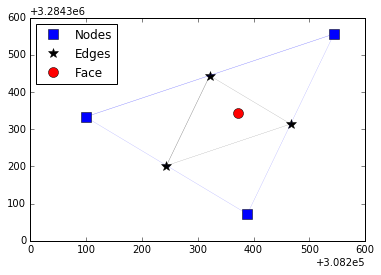

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)

i=2
#face-node
cell=cells[i]
#face-edge
fac = face[i]

ax.plot(xp[cell],yp[cell],'bs',markersize=10)
ax.plot(xe[fac],ye[fac],'k*',markersize=10)
ax.plot(xv[i],yv[i],'ro',markersize=10)
ax.legend(('Nodes','Edges','Face'),loc=0,numpoints=1)
ax.plot(xp[cell],yp[cell],'b',lw=0.2,alpha=0.5)
ax.plot(xe[fac],ye[fac],'k',lw=0.2,alpha=0.5)
ax.plot([xp[cell[2]],xp[cell[0]]],[yp[cell[2]],yp[cell[0]]],'b',lw=0.4,alpha=0.5)
ax.plot([xe[fac[2]],xe[fac[0]]],[ye[fac[2]],ye[fac[0]]],'k',lw=0.4,alpha=0.5)


# Plotting Options:
## A. Plotting using scatter plot

[]

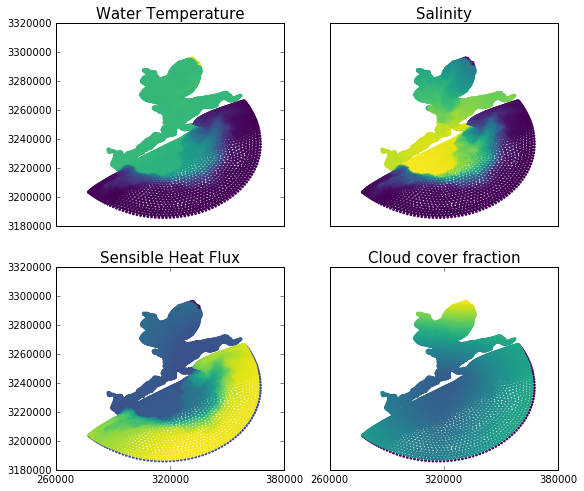

In [45]:
fig = plt.figure(figsize=(9,8))

ax1 = fig.add_subplot(221)
ax1.scatter(xv,yv,c=temp,s=8,edgecolor='None',cmap='viridis')
ax1.set_title('Water Temperature',fontsize=15)
ax1.set_xticks([])

ax2 = fig.add_subplot(222)
ax2.scatter(xv,yv,c=salt,s=8,edgecolor='None',cmap='viridis')
ax2.set_title('Salinity',fontsize=15)
ax2.set_xticks([])
ax2.set_yticks([])

ax3 = fig.add_subplot(223)
ax3.scatter(xv,yv,c=Hs,s=8,edgecolor='None',cmap='viridis')
ax3.set_title('Sensible Heat Flux',fontsize=15)
ax3.set_xticks([260000,320000,380000])

ax4 = fig.add_subplot(224)
ax4.scatter(xv,yv,c=cloud,s=8,edgecolor='None',cmap='viridis')
ax4.set_title('Cloud cover fraction',fontsize=15)
ax4.set_xticks([260000,320000,380000])
ax4.set_yticks([])

## B. Plotting on a triangulation
### 1. Create a Delauney triangulation of the data

### Triangulation of the faces
    - Doesn't handle non convex shapes well
    - No good way to specify which triangles to mask

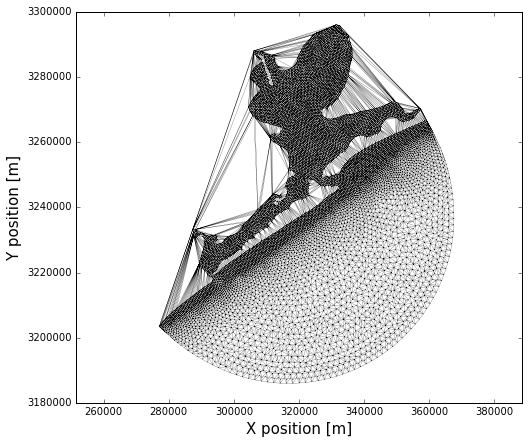

In [10]:
tri_face = matplotlib.tri.Triangulation(np.array(xv),np.array(yv))

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111)

ax.triplot(tri_face,lw=.2,c='k')
ax.axis('equal')
ax.set_xlabel('X position [m]',fontsize=15)
ax.set_ylabel('Y position [m]',fontsize=15)

### Triangulation of the nodes using the node-face-connectivity matrix, cells
    - Includes input triangles=np.asarray(cells)
    - size of node-face connectivity matrix: (Number of faces, 3)
    - Connects the three nodes associated with each cell face
    - This is the triangulation we will be working with for the rest
    of this presentation

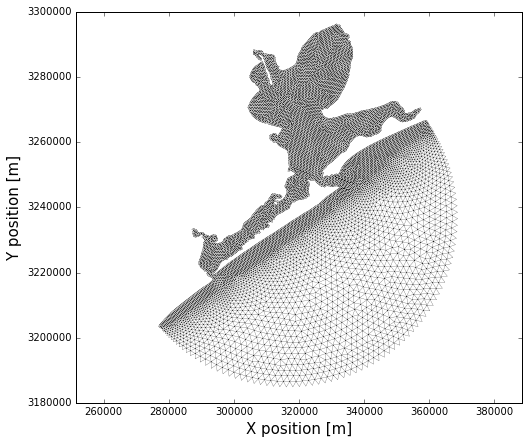

In [11]:
tri_node = matplotlib.tri.Triangulation(np.array(xp),np.array(yp),triangles=np.asarray(cells))

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111)

ax.triplot(tri_node,lw=.2,c='k')
ax.axis('equal')
ax.set_xlabel('X position [m]',fontsize=15)
ax.set_ylabel('Y position [m]',fontsize=15)

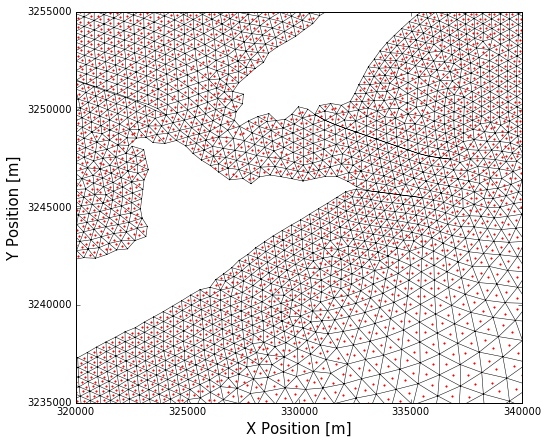

In [46]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111)

ax.triplot(tri_node,lw=.5,c='k')
ax.set_xlim([320000,340000])
ax.set_ylim([3235000,3255000])
ax.plot(xv,yv,'r.',markersize=3)
ax.set_xlabel('X Position [m]',fontsize=15)
ax.set_ylabel('Y Position [m]',fontsize=15)

### 2. Different options for plotting triangulations within matplotlib
    
    - Triplot
    - Tripcolor
    - Tricontour
    - Tricontourf
    
    *Important characteristics of triangulations:
        - tri.triangles: size = (Number of triangles, 3)
            Gives the locations of the three vertices of each triangle
        - tri.x and tri.y: size = (Number of nodes,)
            Gives the x and y coordinates of each node point used to 
            form the triangulation
    


# Triplot
    - used above
    - Inputs:
        - Only required input is the triangulation you created
        - Can also include keyword arguments and values which are the 
        same as we have used throughout the course for matplotlib
        

# Tripcolor
    - Very similar to plt.pcolor for uniform grids
    - Inputs:
        - Takes the triangulation and an array-like z with length of 
        tri.triangles
        - There is a value for each triangle within the triangulation


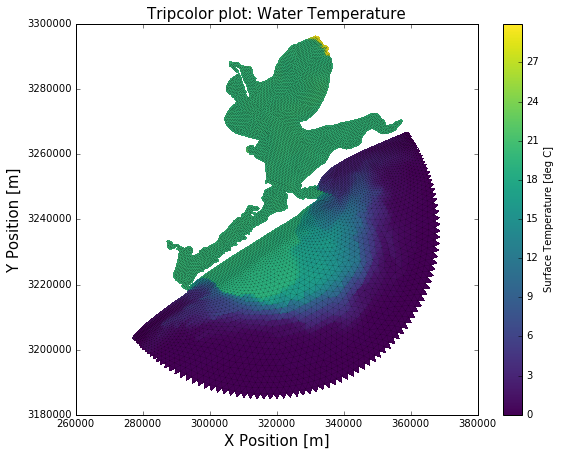

In [10]:
plt.figure(figsize=(9,7))
plt.triplot(tri_node,lw=.2,c='k',alpha=0.5)
plt.tripcolor(tri_node,temp,cmap='viridis')
plt.colorbar().set_label('Surface Temperature [deg C]')
plt.title('Tripcolor plot: Water Temperature',fontsize=15)
plt.xlabel('X Position [m]',fontsize=15)
plt.ylabel('Y Position [m]',fontsize=15)

([], <a list of 0 Text yticklabel objects>)

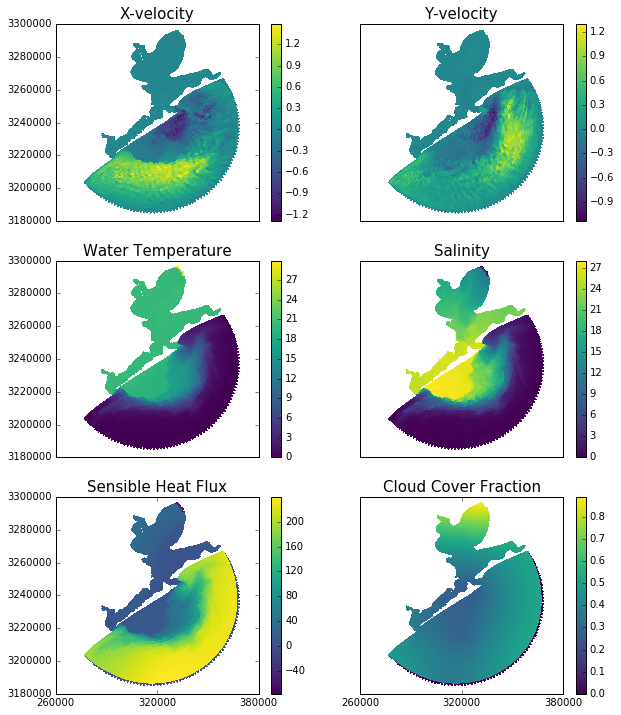

In [14]:
plt.figure(figsize=(10,12))
plt.subplot(321)
#plt.triplot(tri_node,lw=.2,c='k',alpha=0.5)
plt.tripcolor(tri_node,uc,cmap='viridis')
plt.colorbar()
plt.title('X-velocity',fontsize=15)
plt.xticks([])

plt.subplot(322)
#plt.triplot(tri_node,lw=.2,c='k',alpha=0.5)
plt.tripcolor(tri_node,vc,cmap='viridis')
plt.colorbar()
plt.title('Y-velocity',fontsize=15)
plt.xticks([])
plt.yticks([])

plt.subplot(323)
#plt.triplot(tri_node,lw=.2,c='k',alpha=0.5)
plt.tripcolor(tri_node,temp,cmap='viridis')
plt.colorbar()
plt.title('Water Temperature',fontsize=15)
plt.xticks([])

plt.subplot(324)
#plt.triplot(tri_node,lw=.2,c='k',alpha=0.5)
plt.tripcolor(tri_node,salt,cmap='viridis')
plt.colorbar()
plt.title('Salinity',fontsize=15)
plt.yticks([])
plt.xticks([])

plt.subplot(325)
#plt.triplot(tri_node,lw=.2,c='k',alpha=0.5)
plt.tripcolor(tri_node,Hs,cmap='viridis')
plt.colorbar()
plt.title('Sensible Heat Flux',fontsize=15)
plt.xticks([260000,320000,380000])

plt.subplot(326)
#plt.triplot(tri_node,lw=.2,c='k',alpha=0.5)
plt.tripcolor(tri_node,cloud,cmap='viridis')
plt.colorbar()
plt.title('Cloud Cover Fraction',fontsize=15)
plt.xticks([260000,320000,380000])
plt.yticks([])

# Tricontour and tricontourf
    - Similar to plt.contour and plt.contourf
    - Need the values at each point in the triangulation instead of 
    a value per triangle
    - Inputs:
        - Triangluation
        - z values with length tri.x or tri.y

In [31]:
#Need to find values for each node point instead of each triagle:
t=[]
s=[]
h=[]
c=[]
nodetemp=[]
nodesalt=[]
nodeHs=[]
nodecloud=[]

cell = np.asarray(cells)
for i in range(len(xp)):
    new = np.where(cell==i)
    new = np.unique(new)
    for ind in new:
        t.append(temp[ind])
        s.append(salt[ind])
        h.append(Hs[ind])
        c.append(cloud[ind])
    nodetemp.append(np.mean(t))
    nodesalt.append(np.mean(s))
    nodeHs.append(np.mean(h))
    nodecloud.append(np.mean(c))

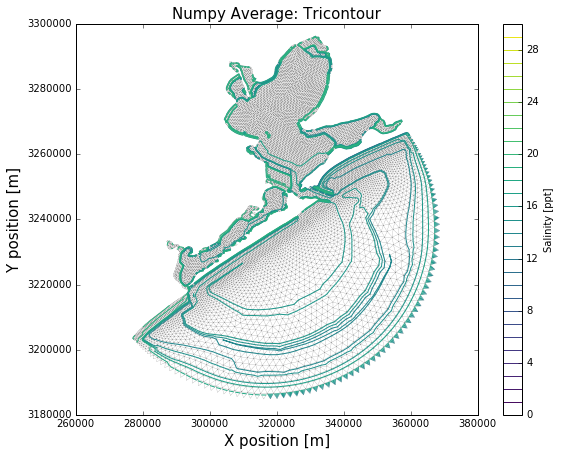

In [41]:
plt.figure(figsize=(9,7))

levels = np.linspace(0,30.0,31)
plt.triplot(tri_node,lw=.2,c='k',alpha=0.5)
plt.tricontour(tri_node,nodesalt,levels=levels,cmap='viridis',lw=10)
plt.colorbar().set_label('Salinity [ppt]')
plt.xlabel('X position [m]',fontsize=15)
plt.ylabel('Y position [m]',fontsize=15)
plt.title('Numpy Average: Tricontour',fontsize=15)

In [29]:
salt_interp = matplotlib.tri.LinearTriInterpolator(tri_face,salt)

salt_node = []
for i,x in enumerate(xp):
    salt_node.append(salt_interp(xp[i],yp[i]).data)


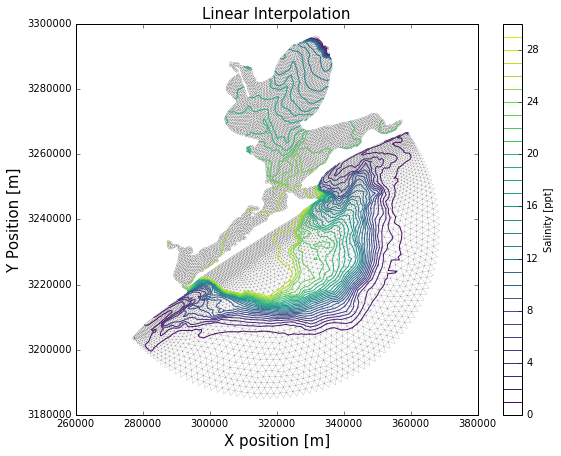

In [42]:
salt_node = np.asarray(salt_node)
salt_node = np.ma.masked_where(np.isnan(salt_node)==True,salt_node)

levels = np.linspace(0,30.0,31)
plt.figure(figsize=(9,7))
plt.triplot(tri_node,c='k',linewidth=0.2,alpha=0.5)
plt.tricontour(tri_node,salt_node,levels=levels,cmap='viridis',lw=10)
plt.colorbar().set_label('Salinity [ppt]')
plt.title('Linear Interpolation',fontsize=15)
plt.xlabel('X position [m]',fontsize=15)
plt.ylabel('Y Position [m]',fontsize=15)

In [26]:
salt_interp_cubic = matplotlib.tri.CubicTriInterpolator(tri_face,salt)

salt_node_cubic = []
for i,x in enumerate(xp):
    salt_node_cubic.append(salt_interp_cubic(xp[i],yp[i]).data)


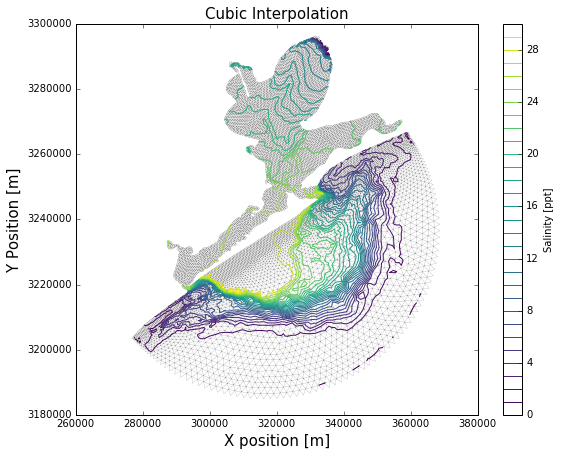

In [43]:
salt_node_cubic = np.asarray(salt_node_cubic)
salt_node_cubic = np.ma.masked_where(np.isnan(salt_node_cubic)==True,salt_node_cubic)

levels = np.linspace(0,30.0,31)
plt.figure(figsize=(9,7))
plt.triplot(tri_node,c='k',linewidth=0.2,alpha=0.5)
plt.tricontour(tri_node,salt_node_cubic,levels=levels,cmap='viridis',lw=10)
plt.colorbar().set_label('Salinity [ppt]')
plt.title('Cubic Interpolation',fontsize=15)
plt.xlabel('X position [m]',fontsize=15)
plt.ylabel('Y Position [m]',fontsize=15)

# Possible Applications

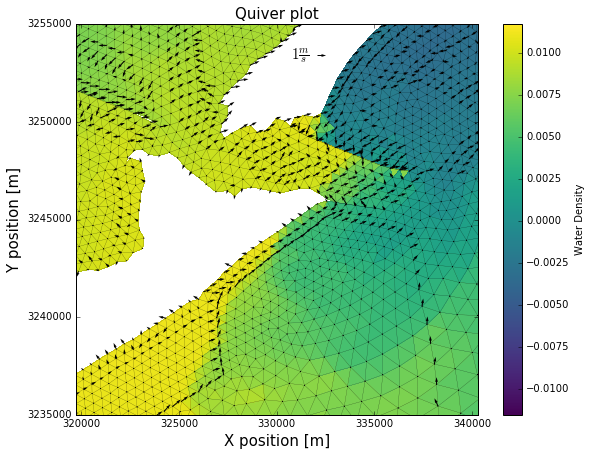

In [205]:
plt.figure(figsize=(9,7))

plt.triplot(tri_node,lw=.2,c='k',alpha=0.8)
plt.tripcolor(tri_node,rho,cmap='viridis')
plt.colorbar().set_label('Water Density')
Q = plt.quiver(tri_node.x,tri_node.y,uc,vc)
qk = plt.quiverkey(Q, 0.6, 0.92, 1, r'$1 \frac{m}{s}$', labelpos='W',
                   fontproperties={'weight': 'bold','size':15})
plt.axis('equal')
plt.axis([320000,340000,3235000,3255000])
plt.xlabel('X position [m]',fontsize=15)
plt.ylabel('Y position [m]',fontsize=15)
plt.title('Quiver plot',fontsize=15)